In [1]:
#import section
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
albany =  cv2.imread('data/albany.png')
albany = cv2.cvtColor(albany,cv2.COLOR_RGB2GRAY)
essex =  cv2.imread('data/essex.png')
essex = cv2.cvtColor(essex,cv2.COLOR_RGB2GRAY)
saratoga =  cv2.imread('data/saratoga.jpg')
saratoga = cv2.cvtColor(saratoga,cv2.COLOR_RGB2GRAY)
wyoming =  cv2.imread('data/wyoming.jpg')
wyoming = cv2.cvtColor(wyoming,cv2.COLOR_RGB2GRAY)
time=pd.read_csv('data/time_series_data.csv')
others=pd.read_csv('data/other_information.csv')
location=pd.read_csv('data/location.csv')
SA=time[time['Combined_Key'].str.match('Saratoga')].iloc[0,:].fillna(0).to_list()[1:]
AL=time[time['Combined_Key'].str.match('Albany')].iloc[0,:].fillna(0).to_list()[1:]
WY=time[time['Combined_Key'].str.match('Wyoming')].iloc[0,:].fillna(0).to_list()[1:]
ES=time[time['Combined_Key'].str.match('Essex')].iloc[0,:].fillna(0).to_list()[1:]

In [3]:
def im_display(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    display(img.shape)

(285, 376)

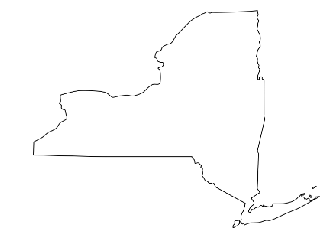

In [4]:
albany = cv2.resize(albany, (376, 285))
im_display(albany)

(285, 376)

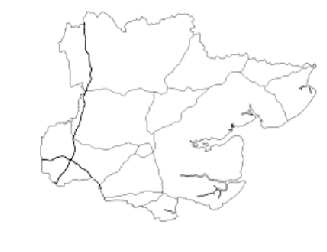

In [5]:
essex = essex[5:-20, 5:-5]
essex = cv2.resize(essex, (376, 285))
im_display(essex)

(285, 376)

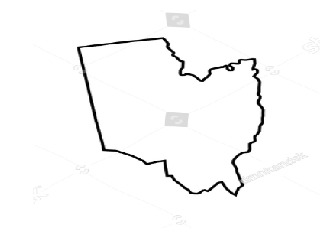

In [6]:
saratoga = saratoga[200:-300, 500:-500]
saratoga = cv2.resize(saratoga, (376, 285))
im_display(saratoga)

(285, 376)

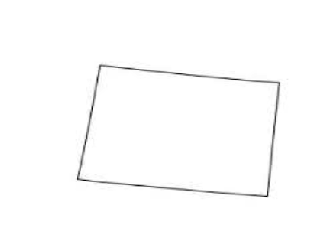

In [7]:
wyoming = wyoming[0:-30, :]
wyoming = cv2.resize(wyoming, (376, 285))
im_display(wyoming)

In [8]:
def get_outline(outline, thre):
    out = []
    for i in range(outline.shape[0]):
    #print(i)
        start = 0
        end = outline.shape[1] - 1
        while start < 376:
            if outline[i][start] >= thre:
                out.append((i, start))
                start += 1
            else:
                break
        while end > 0:
            if outline[i][end] >= thre:
                out.append((i, end))
                end -= 1
            else:
                break
            
    for i in range(outline.shape[1]):
    #print(i)
        start = 0
        end = outline.shape[0] - 1
        while start < 285:
            if outline[start][i] >= thre:
                out.append((start, i))
                start += 1
            else:
                break
        while end > 0:
            if outline[end][i] >= thre:
                out.append((end, i))
                end -= 1
            else:
                break
    return set(out)

In [9]:
albany_outline = get_outline(albany, 230)
essex_outline = get_outline(essex, 245)
saratoga_outline = get_outline(saratoga, 220)
wyoming_outline = get_outline(wyoming, 245)

In [10]:
def change_gray(outline, out_set):
    outline = cv2.cvtColor(outline,cv2.COLOR_GRAY2RGB)
    for i in range(outline.shape[0]):
        for j in range(outline.shape[1]):
            if (i,j) not in out_set:
                outline[i][j] = [100, 100, 100]
    return outline

(285, 376, 3)

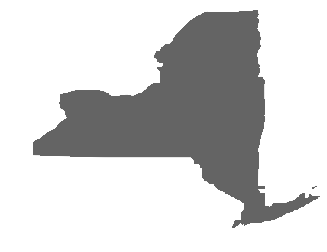

In [11]:
im_display(change_gray(albany, albany_outline))
albany_base = change_gray(albany, albany_outline)

(285, 376, 3)

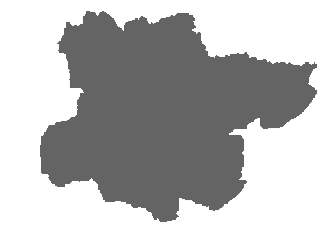

In [12]:
im_display(change_gray(essex, essex_outline))
essex_base = change_gray(essex, essex_outline)

(285, 376, 3)

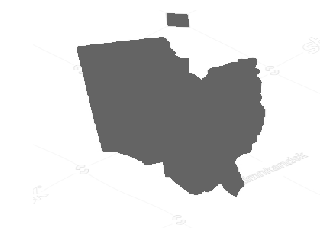

In [13]:
im_display(change_gray(saratoga, saratoga_outline))
saratoga_base = change_gray(saratoga, saratoga_outline)

(285, 376, 3)

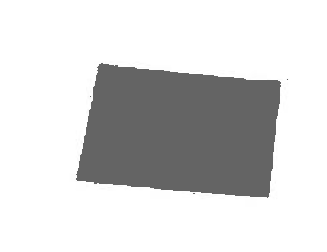

In [14]:
im_display(change_gray(wyoming, wyoming_outline))
wyoming_base = change_gray(wyoming, wyoming_outline)

In [15]:
def get_images(outline, out_set, data):
    total_set = set([(i, j) for i in range(outline.shape[0]) for j in range(outline.shape[1])])
    inner_lst = list(total_set - out_set)
    imgs = []
    for i in tqdm_notebook(range(len(data))):
        temp_img = outline.copy()
        num = int(data[i])
        temp = np.random.choice(range(len(inner_lst)), num, replace=False)
        for i in temp:
            img_i, img_j = inner_lst[i]
            temp_img[img_i][img_j] = [255, 30, 30]
        imgs.append(temp_img)
    return imgs

In [16]:
display('SA', len(SA), max(SA))
display('AL', len(AL), max(AL))
display('WY', len(WY), max(WY))
display('ES', len(ES), max(ES))

'SA'

135

493

'AL'

135

1930

'WY'

135

87

'ES'

135

14969

(285, 376, 3)

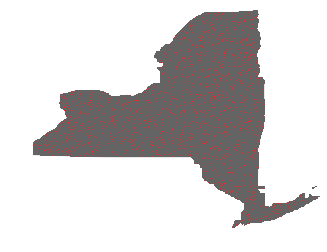

In [17]:
al_imgs = get_images(albany_base, albany_outline, AL)
im_display(al_imgs[-1])

(285, 376, 3)

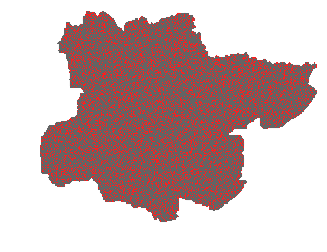

In [18]:
es_imgs = get_images(essex_base, essex_outline, ES)
im_display(es_imgs[-1])

(285, 376, 3)

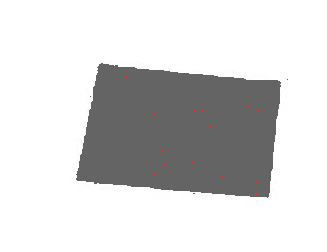

In [19]:
wy_imgs = get_images(wyoming_base, wyoming_outline, WY)
im_display(wy_imgs[-1])

(285, 376, 3)

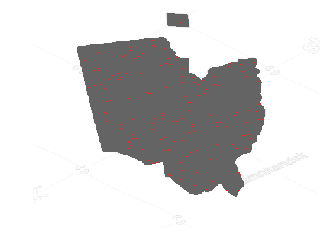

In [20]:
sa_imgs = get_images(saratoga_base, saratoga_outline, SA)
im_display(sa_imgs[-1])

In [30]:
sa_imgs

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [66]:
f_r = np.concatenate((sa_imgs, al_imgs), axis=2)
s_r = np.concatenate((es_imgs, wy_imgs), axis=2)
total = np.concatenate((f_r, s_r), axis=1)

In [68]:
# generate final imgs and gif
import imageio
    
kargs = { 'duration': 0.328 }
imageio.mimsave('results/new_york_state.gif', total, **kargs)